In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

## Data Loading

Loaded the save data from Feature Engineering

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Relevant_health_data.csv')

# Display the first few rows of the DataFrame
data.head()

,index,Timestamp,Subreddit,Type,Post_id,Title,Author,Text,Score,Total_comments,month,hour,day_of_week,Sentiment,Title_word_count,Text_word_count,Category,Processed_Title,Processed_Text
0,0,2018-05-28 19:41:32,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Candle1nTh3Dark,"Thank you for posting this, I've failed univer...",141.0,0.0,5,19,Monday,negative,48,20,MH_Improvement,mental health awareness month schizoaffective ...,thank posting failed university 3 time due hos...
1,1,2018-05-28 19:53:47,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,sciencelove1994,I have schizoaffective mixed episode type. I a...,61.0,0.0,5,19,Monday,positive,48,33,MH_Improvement,mental health awareness month schizoaffective ...,schizoaffective mixed episode type junior ivy ...
2,2,2018-05-28 20:04:29,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Unknown,As someone who is struggling with mental illne...,36.0,0.0,5,20,Monday,negative,48,49,MH_Improvement,mental health awareness month schizoaffective ...,someone struggling mental illness currently co...
3,3,2018-05-28 20:00:07,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,swild89,I’m heading back now at 28! Thanks for the ins...,28.0,0.0,5,20,Monday,positive,48,11,MH_Improvement,mental health awareness month schizoaffective ...,heading back 28 thanks inspiration
4,4,2018-05-28 21:21:11,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,BoozeMeUpScotty,Yayyyy!!! Good for you! This is my favorite ki...,11.0,0.0,5,21,Monday,positive,48,499,MH_Improvement,mental health awareness month schizoaffective ...,yayyyy good favorite kind post see anywhere wo...


> The above data has the preprocessed title, text and category

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838721 entries, 0 to 838720
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             838721 non-null  int64  
 1   Timestamp         838721 non-null  object 
 2   Subreddit         838721 non-null  object 
 3   Type              838721 non-null  object 
 4   Post_id           838721 non-null  object 
 5   Title             838721 non-null  object 
 6   Author            838721 non-null  object 
 7   Text              838721 non-null  object 
 8   Score             838721 non-null  float64
 9   Total_comments    838721 non-null  float64
 10  month             838721 non-null  int64  
 11  hour              838721 non-null  int64  
 12  day_of_week       838721 non-null  object 
 13  Sentiment         838721 non-null  object 
 14  Title_word_count  838721 non-null  int64  
 15  Text_word_count   838721 non-null  int64  
 16  Category          83

In [ ]:
data.isnull().sum()

,0
index,0
Timestamp,0
Subreddit,0
Type,0
Post_id,0
Title,0
Author,0
Text,0
Score,0
Total_comments,0


In [ ]:
data = data.dropna(subset=['Processed_Title', 'Processed_Text']).reset_index(drop=True)


In [ ]:
data.isnull().sum()

,0
index,0
Timestamp,0
Subreddit,0
Type,0
Post_id,0
Title,0
Author,0
Text,0
Score,0
Total_comments,0


## Model Training

> Considered the relevant columns for X and target value for y

In [ ]:
relevant_columns = [
    'Subreddit',  'Title_word_count', 'Text_word_count',
    'Score', 'Total_comments','Sentiment' ,'Processed_Title', 'Processed_Text'
]

## Label Encoding and Text vectorization

In [ ]:
# Selecting relevant data for X
X = data[relevant_columns]
y = data['Category']

# Text vectorization for 'Processed_Title' and 'Processed_Text'
vectorizer_title = TfidfVectorizer(max_features=1000)
vectorizer_text = TfidfVectorizer(max_features=5000)


# Label encoding for categorical variables
label_encoder = LabelEncoder()
X['Subreddit'] = label_encoder.fit_transform(X['Subreddit'])
X['Sentiment'] = label_encoder.fit_transform(X['Sentiment'])

# Standardizing numerical columns
scaler = StandardScaler()

In [ ]:


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [ ]:

# Vectorizing text features for training data
X_train_title_tfidf = vectorizer_title.fit_transform(X_train['Processed_Title'])
X_train_text_tfidf = vectorizer_text.fit_transform(X_train['Processed_Text'])

X_test_title_tfidf = vectorizer_title.transform(X_test['Processed_Title'])
X_test_text_tfidf = vectorizer_text.transform(X_test['Processed_Text'])

# Dropping the original text columns (since they are now vectorized)
X_train = X_train.drop(columns=['Processed_Title', 'Processed_Text'])
X_test = X_test.drop(columns=['Processed_Title', 'Processed_Text'])

In [ ]:

# Scaling numerical columns
X_train[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']] = scaler.fit_transform(
    X_train[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']]
)
X_test[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']] = scaler.transform(
    X_test[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']]
)

In [ ]:
# Concatenating vectorized text data with the other features
import scipy
X_train_combined = scipy.sparse.hstack([X_train, X_train_title_tfidf, X_train_text_tfidf])
X_test_combined = scipy.sparse.hstack([X_test, X_test_title_tfidf, X_test_text_tfidf])

In [ ]:
import joblib
import os

# Directory to save the models
model_dir = './content/drive/MyDrive/saved_models'
os.makedirs(model_dir, exist_ok=True)


In [ ]:
# Function to save and evaluate model
def train_save_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_combined, y_train)

    # Save the trained model
    model_path = os.path.join(model_dir, f'{model_name}.joblib')
    joblib.dump(model, model_path)
    print(f"{model_name} saved to {model_path}")

    # Evaluate the model
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))


## Logistic Regression


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
train_save_evaluate_model(logistic_model, 'logistic_regression')



# Random Forest Classifier

In [ ]:
Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_save_evaluate_model(model=rf_model, model_name='random_forest')



# Deep Learning Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,Input, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json
import os


In [ ]:
# Parameters
max_vocab_size = 20000
max_sequence_length = 100
embedding_dim = 50

In [ ]:
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(data['Processed_Text'].values)
X_text = tokenizer.texts_to_sequences(data['Processed_Text'].values)
X_text = pad_sequences(X_text, maxlen=max_sequence_length)


In [ ]:

# Select relevant columns and separate categorical from numerical
relevant_columns = ['Title_word_count', 'Text_word_count', 'Score', 'Total_comments', 'Sentiment']
numerical_columns = ['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']
categorical_columns = ['Sentiment']

# Scale the numerical features
X_numerical = data[numerical_columns]
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)

# Encode the categorical features
label_encoder = LabelEncoder()
X_categorical = label_encoder.fit_transform(data['Sentiment'])

# Combine numerical and categorical features
X_additional = np.concatenate([X_numerical, X_categorical.reshape(-1, 1)], axis=1)



In [ ]:

# Concatenate text and additional features along the second axis
X_combined = np.concatenate([X_text, X_additional], axis=1)

# Prepare labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Category'].values)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Model  # Ensure Model is imported
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate

# Define the inputs for the model
text_input = Input(shape=(max_sequence_length,))
additional_input = Input(shape=(X_additional.shape[1],))

# Text processing layers (embedding and convolution for text data)
embedding_layer = Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)
conv_layer = Conv1D(128, 5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)

# Concatenate text and additional inputs
concatenated = Concatenate()([pooling_layer, additional_input])

# Fully connected layers
dense_layer = Dense(32, activation='relu')(concatenated)
dropout_layer = Dropout(0.7)(dense_layer)
output_layer = Dense(4, activation='softmax')(dropout_layer)  # Multi classification

# Compile the model with appropriate loss function for multi-class classification
model = Model(inputs=[text_input, additional_input], outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Model summary
model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 100, 50)        │      1,000,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 96, 128)        │         32,128 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 128)            │              0 │ conv1d[0][0]           │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 133)            │              0 │ global_max_pooling1d[… │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │          4,288 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 4)              │            132 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,036,548 (3.95 MB)

 Trainable params: 1,036,548 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set up checkpointing to save model weights
checkpoint_dir = './content/drive/MyDrive/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model-{epoch:02d}-{val_accuracy:.2f}.weights.h5")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)


# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=4,          # Stop after 1 epoch with no improvement
    restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
    verbose=1
)

# Train the model and save history
history = model.fit(
    [X_train[:, :max_sequence_length], X_train[:, max_sequence_length:]],  # Adjust input data as needed
    y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save training history
history_path = 'training_history.json'
with open(history_path, 'w') as f:
    json.dump(history.history, f)

print(f"Training history saved to {history_path}")



Epoch 1/10
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6693 - loss: 0.7620
Epoch 1: val_accuracy improved from -inf to 0.71460, saving model to ./content/drive/MyDrive/checkpoints/model-01-0.71.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 423s 26ms/step - accuracy: 0.6693 - loss: 0.7620 - val_accuracy: 0.7146 - val_loss: 0.6558
Epoch 2/10
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7148 - loss: 0.6657
Epoch 2: val_accuracy did not improve from 0.71460
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 442s 26ms/step - accuracy: 0.7148 - loss: 0.6657 - val_accuracy: 0.7146 - val_loss: 0.6498
Epoch 3/10
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7304 - loss: 0.6359
Epoch 3: val_accuracy improved from 0.71460 to 0.71603, saving model to ./content/drive/MyDrive/checkpoints/model-03-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 438s 25ms/step - accuracy: 0.7304 - loss: 0.6359 - val_accuracy: 0.7160 - val_loss: 0.6507
Epoch 4/10
16512/16514 ━━━━━━━━━━━━━━━━━━

In [ ]:
# # Reload model from checkpoint
# latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
# if latest_checkpoint:
#     model.load_weights(latest_checkpoint)
#     print(f"Loaded model from {latest_checkpoint}")

# # Continue training if needed
# model.fit(
#     X_train, y_train,
#     epochs=5,  # Add more epochs as needed
#     validation_split=0.2,
#     batch_size=32
# )

# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)



In [ ]:
# Split X_test into text and additional features
X_test_text = X_test[:, :max_sequence_length]           # Text input
X_test_additional = X_test[:, max_sequence_length:]     # Additional features input

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


5161/5161 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.7151 - loss: 0.6505
Test Accuracy: 0.71


In [ ]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))


Training and Validation Accuracy: [0.6881565451622009, 0.7140991687774658, 0.7286913394927979, 0.7452439665794373, 0.7611929774284363, 0.7757245302200317] [0.7145993113517761, 0.7145917415618896, 0.716029942035675, 0.7128734588623047, 0.7110189199447632, 0.7070600986480713]


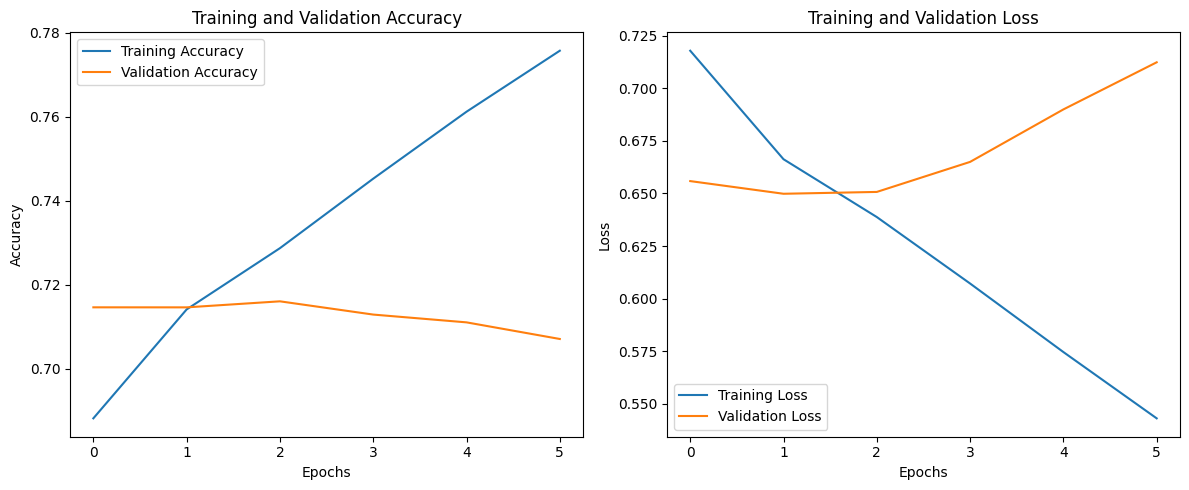

In [ ]:
import json
import matplotlib.pyplot as plt

# Load training history
history_path = 'training_history.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()




Accuracy:

Training Accuracy: There is a steady increase in training accuracy across the epochs, indicating that the model is learning from the training data and improving in performance.
Validation Accuracy: The validation accuracy initially shows a slight improvement but plateaus early and even begins to decrease. This suggests that the model might be starting to overfit, as it performs well on the training data but not as effectively on unseen validation data.
Loss:

Training Loss: The training loss consistently decreases, showing that the model is minimizing the error on the training data.
Validation Loss: The validation loss, on the other hand, does not follow the same trend. It decreases slightly at the start but begins to increase in later epochs. This divergence between training and validation loss is a sign of overfitting.
Early Stopping:

Early stopping was triggered after epoch 6, restoring the model weights to epoch 2, which had the best validation accuracy of around 71.60%. This is a good decision as the model's performance on validation data deteriorated after epoch 2, further confirming overfitting.
Test Performance:

The final test accuracy is 71.51%, which aligns closely with the best validation accuracy, suggesting that the early-stopped model has generalized reasonably well to unseen data.

Training Accuracy vs. Validation Accuracy:

The training accuracy consistently improves, reaching close to 78%, while the validation accuracy peaks early and then gradually declines. This reinforces the likelihood of overfitting.
Training Loss vs. Validation Loss:

The training loss decreases steadily, indicating effective learning on the training data.
The validation loss, however, initially drops but then starts to increase after the second epoch, which again suggests overfitting. The model is unable to generalize effectively to validation data, as seen by the increase in validation loss and the decrease in validation accuracy.


In [ ]:
# Set up checkpointing to save model weights
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model1-50-{epoch:02d}-{val_accuracy:.2f}.weights.h5")  # Changed extension to .weights.h5
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Stop after 1 epoch with no improvement
    restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
    verbose=1
)

# Train the model and save history
history = model.fit(
    [X_train[:, :max_sequence_length], X_train[:, max_sequence_length:]],  # Adjust input data as needed
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save training history
history_path = 'training_history50.json'
with open(history_path, 'w') as f:
    json.dump(history.history, f)

print(f"Training history saved to {history_path}")


Epoch 1/50
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7320 - loss: 0.6310
Epoch 1: val_accuracy improved from -inf to 0.71717, saving model to ./checkpoints/model1-50-01-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 464s 28ms/step - accuracy: 0.7320 - loss: 0.6310 - val_accuracy: 0.7172 - val_loss: 0.6537
Epoch 2/50
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7487 - loss: 0.6002
Epoch 2: val_accuracy did not improve from 0.71717
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 426s 26ms/step - accuracy: 0.7487 - loss: 0.6002 - val_accuracy: 0.7133 - val_loss: 0.6656
Epoch 3/50
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7654 - loss: 0.5671
Epoch 3: val_accuracy did not improve from 0.71717
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 450s 26ms/step - accuracy: 0.7654 - loss: 0.5671 - val_accuracy: 0.7131 - val_loss: 0.6892
Epoch 4/50
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7819 - loss: 0.5319
Epoch 4: val_accuracy did not improve from 0.71717

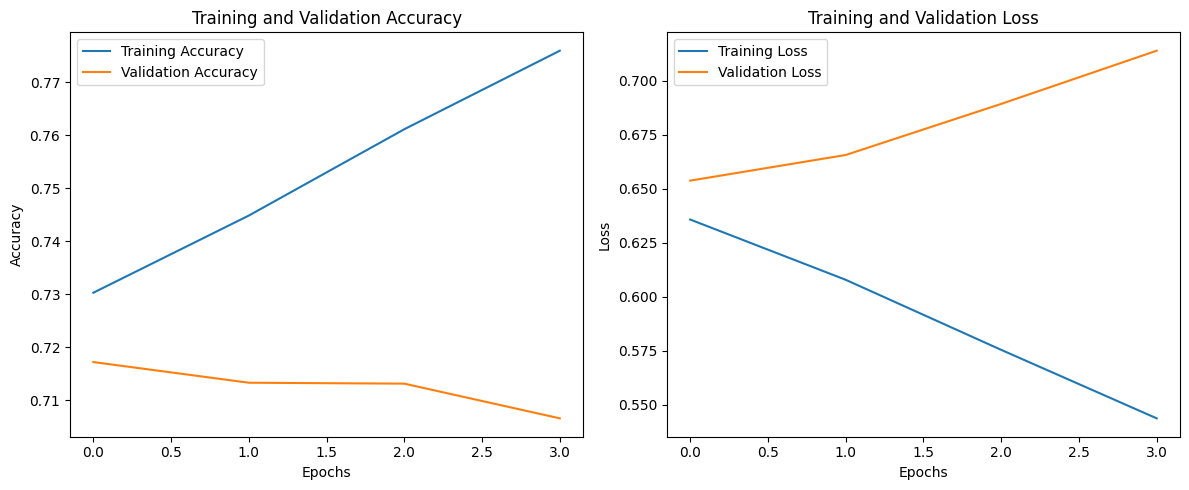

In [ ]:
import json
import matplotlib.pyplot as plt

# Load training history
history_path = 'training_history50.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Training accuracy steadily improves over the epochs, reaching close to 78% by the fourth epoch, indicating that the model is learning effectively on the training set.
Validation accuracy peaks in the first epoch at around 71.72% and then declines, indicating early signs of overfitting. This is confirmed by the validation accuracy not improving after the first epoch.

Training loss consistently decreases, showing that the model is minimizing error on the training data.
Validation loss starts low but increases from the second epoch onward. This divergence between training and validation loss is a classic sign of overfitting, as the model performs well on the training data but fails to generalize effectively on the validation data.
Early Stopping:

Early stopping was triggered after the fourth epoch, restoring the model weights to those from the first epoch, where the highest validation accuracy was observed. This suggests that the model achieved its best generalization early in training.
Test Performance:

The final test accuracy is around 71.67%, which aligns closely with the validation accuracy at the best epoch, indicating consistency in generalization.

In [ ]:
# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)

In [ ]:
# Split X_test into text and additional features
X_test_text = X_test[:, :max_sequence_length]           # Text input
X_test_additional = X_test[:, max_sequence_length:]     # Additional features input

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

5161/5161 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7167 - loss: 0.6546
Test Accuracy: 0.72


In [ ]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))


Training and Validation Accuracy: [0.7302525639533997, 0.7448163032531738, 0.7611078023910522, 0.7759232521057129] [0.7171653509140015, 0.7132670879364014, 0.7130929827690125, 0.706545352935791]


In [ ]:
from tensorflow.keras.layers import Concatenate, Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model

# Define inputs for text and additional features
text_input = Input(shape=(max_sequence_length,), name="text_input")
additional_input = Input(shape=(X_additional.shape[1],), name="additional_input")

# Embedding layer
embedding_layer = Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length)(text_input)

# Multiple Conv1D layers with different filter sizes (Kim's model)
conv_3 = Conv1D(64, 3, activation='relu')(embedding_layer)
conv_4 = Conv1D(64, 4, activation='relu')(embedding_layer)
conv_5 = Conv1D(64, 5, activation='relu')(embedding_layer)

# Global Max Pooling for each convolution layer
pool_3 = GlobalMaxPooling1D()(conv_3)
pool_4 = GlobalMaxPooling1D()(conv_4)
pool_5 = GlobalMaxPooling1D()(conv_5)

# Concatenate all pooled features
concatenated = Concatenate()([pool_3, pool_4, pool_5, additional_input])

# Fully connected layers
dense_layer = Dense(32, activation='relu')(concatenated)
dropout_layer = Dropout(0.7)(dense_layer)
output_layer = Dense(4, activation='softmax')(dropout_layer)  # Multi-class classification (4 classes)

# Compile the model with appropriate loss for multi-class classification
model_kim = Model(inputs=[text_input, additional_input], outputs=output_layer)
model_kim.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_kim.summary()




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 100, 64)        │      1,280,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 98, 64)         │         12,352 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 97, 64)         │         16,448 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 96, 64)         │         20,544 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 64)             │              0 │ conv1d_1[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 64)             │              0 │ conv1d_2[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 64)             │              0 │ conv1d_3[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ additional_input          │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 197)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ additional_input[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          6,336 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │            132 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,335,812 (5.10 MB)

 Trainable params: 1,335,812 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Split X_train and X_test into separate inputs for training and testing
X_train_text = X_train[:, :max_sequence_length]           # Text input
X_train_additional = X_train[:, max_sequence_length:]     # Additional features input

# Set up checkpointing and early stopping
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "modelkim-{epoch:02d}-{val_accuracy:.2f}.weights.h5")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_kim = model_kim.fit(
    [X_train_text, X_train_additional],  # Provided text and additional inputs separately
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save the training history
history_path = 'kim_cnn_history.json'
with open(history_path, 'w') as f:
    json.dump(history_kim.history, f)
print(f"Training history saved to {history_path}")

# Prepare test data for evaluation
X_test_text = X_test[:, :max_sequence_length]
X_test_additional = X_test[:, max_sequence_length:]

# Evaluate the model on test data
test_loss, test_accuracy = model_kim.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



Epoch 1/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6694 - loss: 0.7569
Epoch 1: val_accuracy improved from -inf to 0.71097, saving model to ./checkpoints/modelkim-01-0.71.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 662s 40ms/step - accuracy: 0.6694 - loss: 0.7569 - val_accuracy: 0.7110 - val_loss: 0.6628
Epoch 2/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7148 - loss: 0.6630
Epoch 2: val_accuracy improved from 0.71097 to 0.71530, saving model to ./checkpoints/modelkim-02-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 672s 39ms/step - accuracy: 0.7148 - loss: 0.6630 - val_accuracy: 0.7153 - val_loss: 0.6486
Epoch 3/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7299 - loss: 0.6349
Epoch 3: val_accuracy improved from 0.71530 to 0.71730, saving model to ./checkpoints/modelkim-03-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 688s 40ms/step - accuracy: 0.7299 - loss: 0.6349 - val_accuracy: 0.7173 - val_loss: 0.6526
Epoch 4/50
16514

In [ ]:
# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)

In [ ]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))

Training and Validation Accuracy: [0.6877023577690125, 0.7134785056114197, 0.7286686301231384, 0.7454445958137512, 0.7624116539955139] [0.7109735012054443, 0.7152957320213318, 0.717301607131958, 0.7146825790405273, 0.7122754454612732]


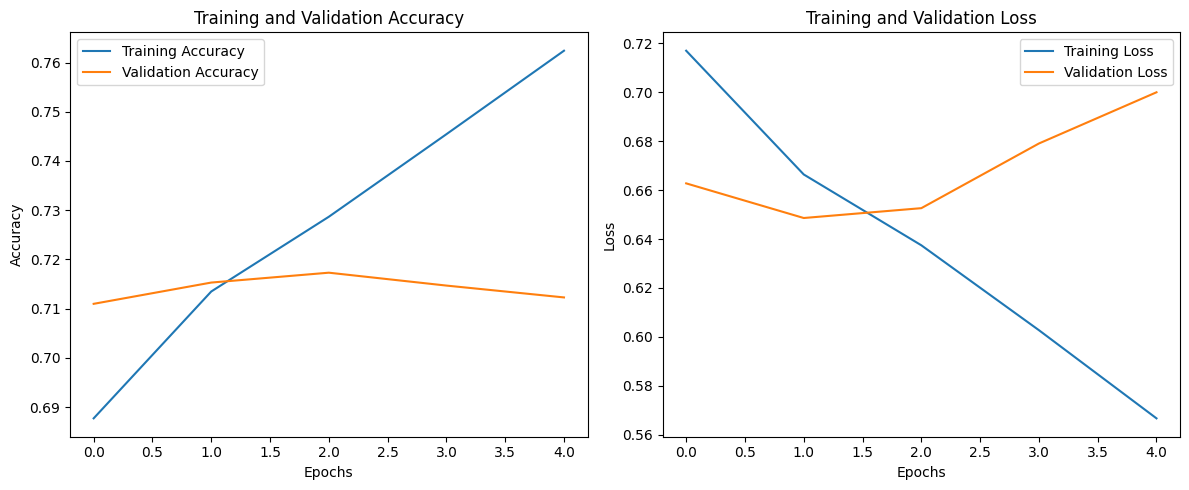

In [ ]:
import json
import matplotlib.pyplot as plt

# Load training history
history_path = 'kim_cnn_history.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Training and Validation Accuracy:

Training accuracy continues to increase, reaching around 76% by the fifth epoch, which shows that the model is effectively learning the training data.
Validation accuracy initially improves, peaking at around epoch 3, but then starts to decline. This suggests that after a few epochs, the model begins to overfit, as it is not able to maintain performance on the validation set.
Training and Validation Loss:

Training loss consistently decreases, which is expected as the model gets better at fitting the training data.
Validation loss, however, shows a different trend. It decreases initially, reaches a minimum, and then starts increasing again, confirming overfitting after a few epochs.
Model Checkpointing:

The best validation accuracy achieved is around 71.73% in the third epoch, and the model saves its weights at this point. This indicates that the best generalization was achieved early in the training, and subsequent epochs did not improve validation performance.
Test Performance:

The test accuracy is around 71.44%, which is consistent with the validation accuracy achieved in the early epochs, confirming the model's generalization ability when early-stopping was applied.



## Recurrent Neural Network (RNN) with LSTM


In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# Define inputs for text and additional features
text_input = Input(shape=(max_sequence_length,), name="text_input")
additional_input = Input(shape=(X_additional.shape[1],), name="additional_input")

# Embedding layer with LSTM
embedding_layer = Embedding(input_dim=max_vocab_size, output_dim=32, input_length=max_sequence_length)(text_input)
lstm_layer = LSTM(32)(embedding_layer)  # Use a single LSTM layer

# Concatenate LSTM output with additional features
concatenated = Concatenate()([lstm_layer, additional_input])

# Dense layer
dense_layer = Dense(32, activation='relu')(concatenated)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(4, activation='softmax')(dropout_layer)

# Compile model
model = Model(inputs=[text_input, additional_input], outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 100, 32)        │        640,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 32)             │          8,320 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ additional_input          │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 37)             │              0 │ lstm[0][0],            │
│ (Concatenate)             │                        │                │ additional_input[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          1,216 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 4)              │            132 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 649,668 (2.48 MB)

 Trainable params: 649,668 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Split X_train and X_test into separate inputs for training and testing
X_train_text = X_train[:, :max_sequence_length]           # Text input
X_train_additional = X_train[:, max_sequence_length:]     # Additional features input

# Set up checkpointing and early stopping
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "modelkim-{epoch:02d}-{val_accuracy:.2f}.weights.h5")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_kim = model.fit(
    [X_train_text, X_train_additional],  # Provided text and additional inputs separately
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save the training history
history_path = 'rnn_lstm_history.json'
with open(history_path, 'w') as f:
    json.dump(history_kim.history, f)
print(f"Training history saved to {history_path}")

# Prepare test data for evaluation
X_test_text = X_test[:, :max_sequence_length]
X_test_additional = X_test[:, max_sequence_length:]

# Evaluate the model on test data
test_loss, test_accuracy = model_kim.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



Epoch 1/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6780 - loss: 0.7449
Epoch 1: val_accuracy improved from -inf to 0.71885, saving model to ./checkpoints/modelkim-01-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 783s 47ms/step - accuracy: 0.6780 - loss: 0.7449 - val_accuracy: 0.7189 - val_loss: 0.6440
Epoch 2/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7280 - loss: 0.6337
Epoch 2: val_accuracy improved from 0.71885 to 0.72600, saving model to ./checkpoints/modelkim-02-0.73.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 779s 46ms/step - accuracy: 0.7280 - loss: 0.6337 - val_accuracy: 0.7260 - val_loss: 0.6300
Epoch 3/50
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7413 - loss: 0.6033
Epoch 3: val_accuracy improved from 0.72600 to 0.72732, saving model to ./checkpoints/modelkim-03-0.73.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 800s 46ms/step - accuracy: 0.7413 - loss: 0.6033 - val_accuracy: 0.7273 - val_loss: 0.6320
Epoch 4/50
16514

In [ ]:
# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)

In [ ]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))

Training and Validation Accuracy: [0.6998306512832642, 0.7268443703651428, 0.7389669418334961, 0.7483247518539429, 0.7589145302772522] [0.7188533544540405, 0.7259989976882935, 0.7273236513137817, 0.7255902290344238, 0.7218962907791138]


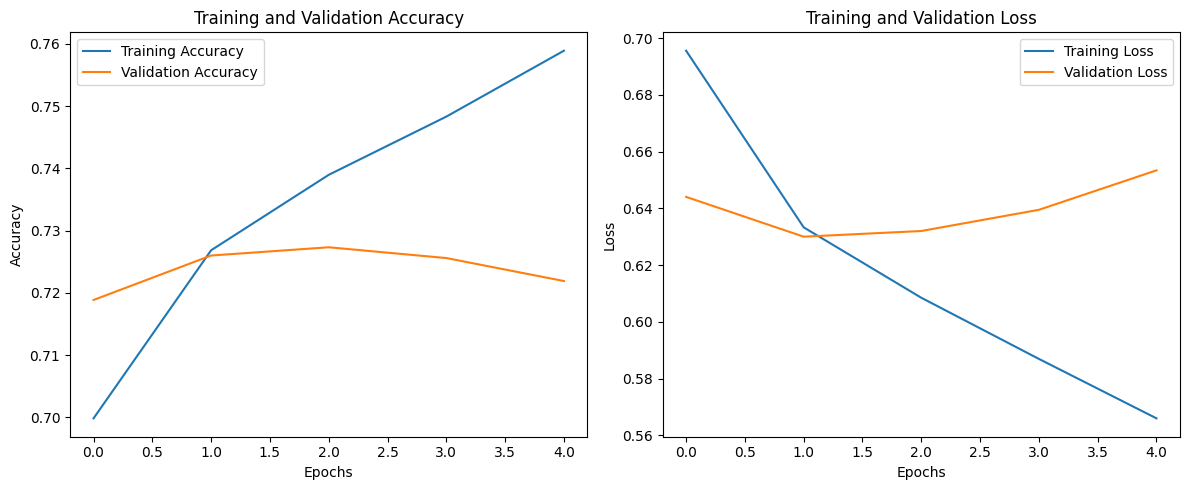

In [ ]:


# Load training history
history_path = 'rnn_lstm_history.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()